In [40]:
train_ratio = 0.8 # for train test split
ticker = 'EURINR=X' # for currency exchange rate

In [41]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical exchange rate data for USD to INR for the past 5 years
data = yf.download(ticker, start='2000-10-20', end='2022-10-20')

# data=pd.read_csv('S&P_500_Index_Data.csv')
# data.rename(columns={'close': 'Close'}, inplace=True)
# data.drop(columns=['date'], inplace=True)

# Display the first few rows of the dataset
print(data.head())
print(data.shape)

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2003-12-01  55.004002  55.014999  54.466999  54.700001  54.700001       0
2003-12-02  54.662998  55.243999  54.359001  55.139000  55.139000       0
2003-12-03  55.162998  55.305000  54.881001  55.181000  55.181000       0
2003-12-04  55.181999  55.325001  54.772999  55.000999  55.000999       0
2003-12-05  55.020000  55.370998  54.880001  55.370998  55.370998       0
(4898, 6)


In [42]:
data = data[['Close']]
original_data = data
print(data.shape)
print(original_data.shape)

(4898, 1)
(4898, 1)


In [43]:
# Creating lag features for time-series data

def create_lag_features(data, lag_steps=1):
    for i in range(1, lag_steps + 1):
        values = data['Close'].shift(i)
        data[f'lag_{i}'] = values
    return data

# Applying lag feature creation to the dataset

lagged_data = create_lag_features(original_data, lag_steps=3)
print(lagged_data.head())

                Close      lag_1      lag_2      lag_3
Date                                                  
2003-12-01  54.700001        NaN        NaN        NaN
2003-12-02  55.139000  54.700001        NaN        NaN
2003-12-03  55.181000  55.139000  54.700001        NaN
2003-12-04  55.000999  55.181000  55.139000  54.700001
2003-12-05  55.370998  55.000999  55.181000  55.139000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5396\3763984461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5396\3763984461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5396\3763984461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [44]:
# Creating rolling mean for time-series data

def create_rolling_mean(data, window_size=3):
    values = data['Close'].rolling(window=window_size).mean()
    data['rolling_mean'] = values
    return data

# Applying rolling mean to the dataset

rolled_data = create_rolling_mean(original_data, window_size=5)
print(rolled_data.head())

                Close      lag_1      lag_2      lag_3  rolling_mean
Date                                                                
2003-12-01  54.700001        NaN        NaN        NaN           NaN
2003-12-02  55.139000  54.700001        NaN        NaN           NaN
2003-12-03  55.181000  55.139000  54.700001        NaN           NaN
2003-12-04  55.000999  55.181000  55.139000  54.700001           NaN
2003-12-05  55.370998  55.000999  55.181000  55.139000       55.0784


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5396\1779863088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rolling_mean'] = values


In [45]:
from scipy.fft import fft

def apply_fourier_transform(data):

    values = data['Close'].values

    fourier_transform = fft(values)

    data['fourier_transform'] = np.abs(fourier_transform)

    return data

# Applying Fourier transformation to the dataset

fourier_data = apply_fourier_transform(original_data)
print(fourier_data.head())

                Close      lag_1      lag_2      lag_3  rolling_mean  \
Date                                                                   
2003-12-01  54.700001        NaN        NaN        NaN           NaN   
2003-12-02  55.139000  54.700001        NaN        NaN           NaN   
2003-12-03  55.181000  55.139000  54.700001        NaN           NaN   
2003-12-04  55.000999  55.181000  55.139000  54.700001           NaN   
2003-12-05  55.370998  55.000999  55.181000  55.139000       55.0784   

            fourier_transform  
Date                           
2003-12-01      344535.086826  
2003-12-02       26733.303858  
2003-12-03       13956.674716  
2003-12-04       14504.084291  
2003-12-05        5268.963353  


In [46]:
train_size = int(len(data) * train_ratio)

X_train, X_test = data[:train_size], data[train_size:]
y_train, y_test = data['Close'][:train_size], data['Close'][train_size:]

# X_train, X_test = data, data
# y_train, y_test = data['Close'], data['Close']

print(X_train.head())

                Close      lag_1      lag_2      lag_3  rolling_mean  \
Date                                                                   
2003-12-01  54.700001        NaN        NaN        NaN           NaN   
2003-12-02  55.139000  54.700001        NaN        NaN           NaN   
2003-12-03  55.181000  55.139000  54.700001        NaN           NaN   
2003-12-04  55.000999  55.181000  55.139000  54.700001           NaN   
2003-12-05  55.370998  55.000999  55.181000  55.139000       55.0784   

            fourier_transform  
Date                           
2003-12-01      344535.086826  
2003-12-02       26733.303858  
2003-12-03       13956.674716  
2003-12-04       14504.084291  
2003-12-05        5268.963353  


In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {

    'learning_rate': [0.01, 0.1, 0.2],

    'max_depth': [3, 5, 7],

    'subsample': [0.8, 0.9, 1.0]

}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [48]:
xgb_model = XGBRegressor(**best_params)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [50]:
print(rmse)

1.0167124445532387


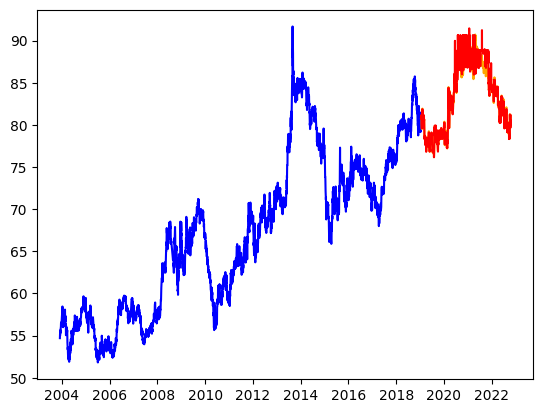

In [51]:
plt.plot(X_train.index, X_train['Close'], color='blue')
plt.plot(X_test.index, X_test['Close'], color='orange')
plt.plot(X_test.index, predictions, color='red')